# Statistical Arbitrage Using Conditional Distribitions via Copula Function

The term "statistical arbitrage" is often used for trading based on "mean reversion" property of asset prices, which means that positive returns with high probability would be followed by negative returns.

In [1]:
import time as tt
import pandas as pd
#import gaussian_copula_stuff as gcs
import statarb_stuff as sa
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this notebook we consider an example of using statistical arbitrage in a simple trading strategy. The strategy applies to 33 stocks traded in American and German markets. It is nased on copula factor models with market indices as factors. To use the strategy we first build models for the first half of 2017.

In [2]:
# create models for the first half of 2017
models, dfi, dfs = sa.all_models()

model for 2017-01-03 built, elapsed time = 3.568 seconds
model for 2017-01-04 built, elapsed time = 7.108 seconds
model for 2017-01-05 built, elapsed time = 10.642 seconds
model for 2017-01-06 built, elapsed time = 14.367 seconds
model for 2017-01-09 built, elapsed time = 19.487 seconds
model for 2017-01-10 built, elapsed time = 23.787 seconds
model for 2017-01-11 built, elapsed time = 27.755 seconds
model for 2017-01-12 built, elapsed time = 31.262 seconds
model for 2017-01-13 built, elapsed time = 34.789 seconds
model for 2017-01-17 built, elapsed time = 38.331 seconds
model for 2017-01-18 built, elapsed time = 41.880 seconds
model for 2017-01-19 built, elapsed time = 45.361 seconds
model for 2017-01-20 built, elapsed time = 48.869 seconds
model for 2017-01-23 built, elapsed time = 52.432 seconds
model for 2017-01-24 built, elapsed time = 55.919 seconds
model for 2017-01-25 built, elapsed time = 59.437 seconds
model for 2017-01-26 built, elapsed time = 62.941 seconds
model for 2017-0

After that we calculate marginal and conditional (given factor values) distributions for all assets and all models.

In [3]:
# create marginal and conditional distributions for all stocks in 'dfs'
df = sa.create_distributions(models, dfi, dfs)

creating all distributions, elapsed time = 126.255 seconds


Next we present difference between conditional and marginal distributions to emphasize significance of stocks returns dependence on factors.

In [4]:
def calc_diff(df, stocks):
    """ difference between conditional and marginal distributions """
    semi = pd.Series()
    sema = pd.Series()
    for stock in stocks:
        dif = df[stock + '_cond'] - df[stock + '_marg']
        semi[stock] = dif.min()
        sema[stock] = dif.max()
    return semi, sema

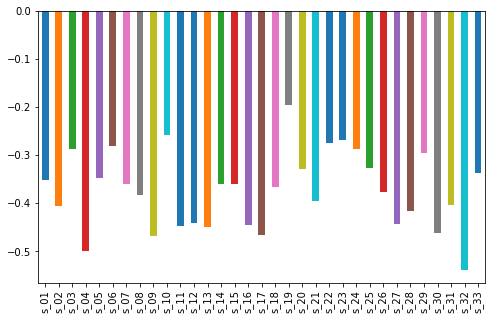

In [5]:
semi, sema = calc_diff(df, dfs.columns)
ind = ['s_{0:02d}'.format(k + 1) for k in range(semi.size)]
semi.index=ind
sema.index=ind
figsize(8, 5);
semi.plot.bar();
savefig('fig_01a.png');

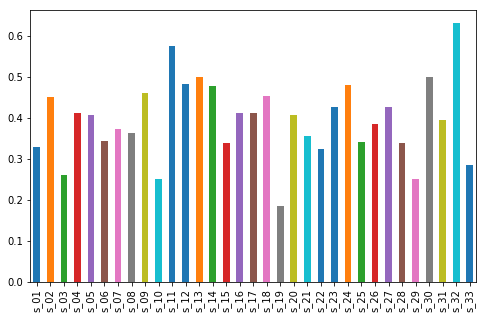

In [6]:
figsize(8, 5);
sema.plot.bar();
savefig('fig_01b.png');

We see that deviation between CDFs ranges from -0.5 to 0.6, which is pretty much.

Now let's run the following strategy involving single stock: fix falues $L<0.5<U$ (buy value and sell value); if current conditional CDF value is less than L, then close all open positions and open a long position in the stock; if the current conditional CDF value is greater than $U$, then close all open positions and open a short position in the the stock; otherwise keep status quo.

In [10]:
se = sa.create_strategies(dfs.columns, df, buy_value=0.2, sell_value=0.8)
se = 100 * (se - 1)
se.index = ind
print('Average return {0:.2f}%'.format(se.mean()))

Average return 1.48%


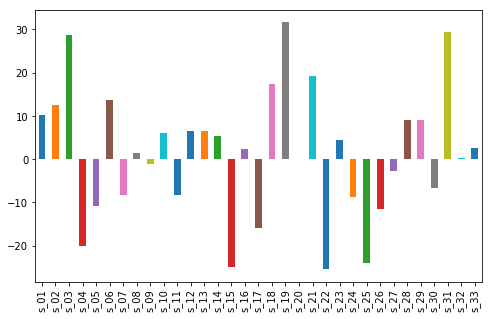

In [8]:
se.plot.bar();
savefig('fig_02.png');

Returns for this strategy during the half of 2017 are presented in the above figure. We see that beign applied to different assets it may bring as much as 30% return, and also as much as 25% loss. Thus statistical arbitrage requires deep studying of assets prior to implementing the strategy. Also note that in practice the approach is applied to portfolios containing huge number of assets, and most likely within high frequency trading framework.